In [26]:
import scipy.signal
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import fir1

In [51]:
def show_plot(x, y, title='', xlabel='', ylabel='', figsize=(8, 6)):
    plt.figure(figsize=figsize)
    plt.plot(x, y)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid()
    plt.show()

In [65]:
f1 = 750   # ГЦ
f2 = 1550  # ГЦ
fd1 = 15000 # ГЦ
fd2 = 3000  # ГЦ
fd3 = 30000 # ГЦ

secs = 1 # с

сформировать двухтональный дискретный сигнал на интервале 1c

In [85]:
def fun(t):
    return np.sin(2 * np.pi * f1 * t) + 0.75 * np.sin(2 * np.pi * f2 * t)

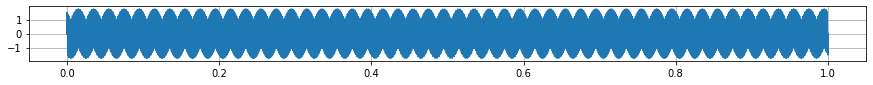

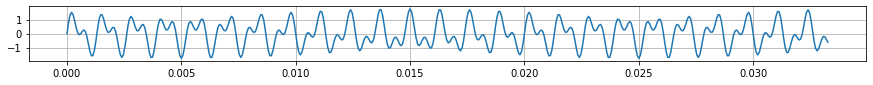

In [86]:
t = np.linspace(0, secs, fd1)

x = fun(t)
show_plot(t, x, figsize=(15, 1))
show_plot(t[:500], x[:500], figsize=(15, 1))

используя окно Хемминга построить спектр сигнал

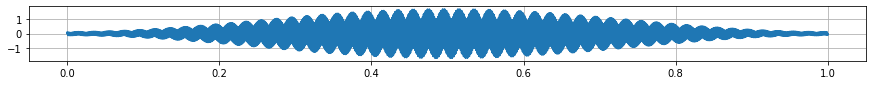

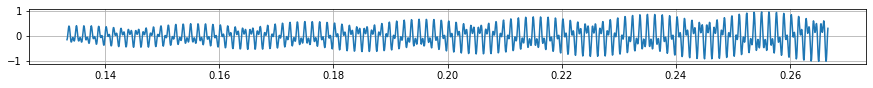

In [87]:
w = scipy.signal.hamming(fd1)
dw = x * w

show_plot(t, dw, figsize=(15, 1))
show_plot(t[2000:4000], dw[2000:4000], figsize=(15, 1))

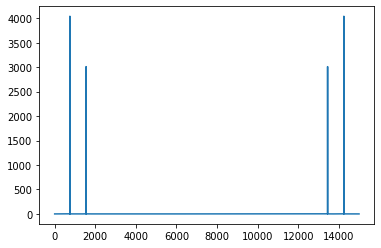

In [88]:
AmpSpec_dw = abs(np.fft.fft(dw)) 

plt.plot(AmpSpec_dw)

задать новую частоту дискретизации fд'' и определить коэффициент децимации

In [89]:
dec = fd1 / fd2
dec

5.0

синтезировать ФНЧ ПНДС с помощью функции fir1

In [59]:
h = scipy.signal.firwin(20, 0.5)
h

array([ 0.00188953,  0.00276977, -0.00529527, -0.00995578,  0.01742331,
        0.02881991, -0.04646496, -0.07642886,  0.14129436,  0.44594799,
        0.44594799,  0.14129436, -0.07642886, -0.04646496,  0.02881991,
        0.01742331, -0.00995578, -0.00529527,  0.00276977,  0.00188953])

построить частотную характеристику синтезированного фильтра с помощью
БПФ

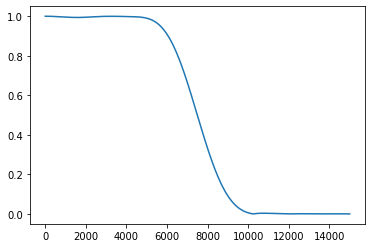

In [63]:
w, h1 = scipy.signal.freqz(h, 1, fd1)
plt.plot(abs(h1))

реализовать ПНДС в соответствии с рис 5.5. Фильтрацию сигнала реализовать с использованием функции filter

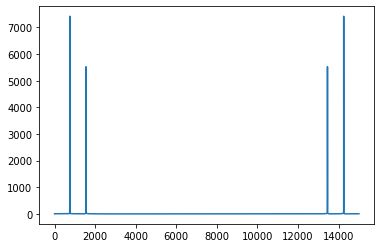

In [64]:
f1_y = scipy.signal.lfilter(h, 1, x)
f1_ampl = abs(np.fft.fft(f1_y))
plt.plot(f1_ampl)
plt.show()

In [91]:
index = np.arange(1, len(x), int(dec))
y = x[index]
y

array([ 0.76251211,  0.43746536,  0.25874347, ...,  0.18471974,
        0.07688263, -1.50635043])

используя окно Хеннинга построить спектр сигнала у

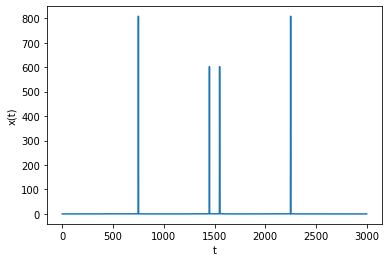

In [92]:
N = len(y)
w = scipy.signal.hamming(N)
dw = y * w

t = np.arange(0, secs, 1/fd2)
fff = np.arange(0, fd2, fd2/len(t))

plt.plot(fff, abs(np.fft.fft(dw)))
plt.xlabel('t')
plt.ylabel('x(t)')
plt.show()